# HW 1 - FCB 4.7

## 4.7 Mixture models: After a posterior analysis on data from a population of squash plants, it was determined that the total vegetable weight of a given plant could be modeled with the following distribution: 
- p(y|theta, sigma^2) = .31dnorm(theta, sigma) + .46dnorm(2theta, 2sigma) + .23dnorm(3theta, 3sigma) 
## Posterior
- 1/sigma^2 ~ gamma(10, 2.5)
- theta|sigma^2 ~ normal(4.1, sigma^2/20).

In [58]:
import numpy as np
import pandas as pd
from random import random, seed
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, gaussian_kde
import matplotlib.animation as animation

## a) Sample at least 5,000 y values from the posterior predictive distribution.

In [59]:
np.random.seed(2016131015)


sigma = gamma.rvs(a=10, scale=1/2.5, size=5000)

sigma

array([3.41113219, 4.26947369, 6.19556875, ..., 4.07998045, 3.90093106,
       6.61904702])

In [60]:
np.random.seed(1)
theta = []
for i in range(len(sigma)):
    theta=np.append(theta,norm.rvs(loc=4.1, scale = np.sqrt((sigma[i])/20), size=1))
    
theta

array([4.77083027, 3.81734888, 3.80603152, ..., 3.74951541, 4.57913106,
       5.38978197])

In [61]:
np.random.seed(2016131015)

y = []
for i in range(len(sigma)):
    y=np.append(y,
                   0.31 * norm.rvs(loc = theta[i], scale = np.sqrt(sigma[i]), size = 1) + 
                   0.46 * norm.rvs(loc = 2 * theta[i], scale = 2 * np.sqrt(sigma[i]), size = 1) +
                   0.23 * norm.rvs(loc = 3 * theta[i], scale = 3 * np.sqrt(sigma[i]), size = 1))

y

array([11.00295685, 10.15837612,  4.35565706, ...,  6.51887794,
        9.93552483, 10.46955089])

## b) Form a 75% quantile-based confidence interval for a new value of Y.

In [62]:
CI = (np.quantile(y_mc, 0.125), np.quantile(y_mc, 0.875))
CI

(5.104506889579647, 10.74434808997568)

## c) Form a 75% HPD(Highest Posterior Density) region for a new Y as follows:

## i. Compute estimates of the posterior density of Y using the density command in R, and then normalize the density values so they sum to 1.

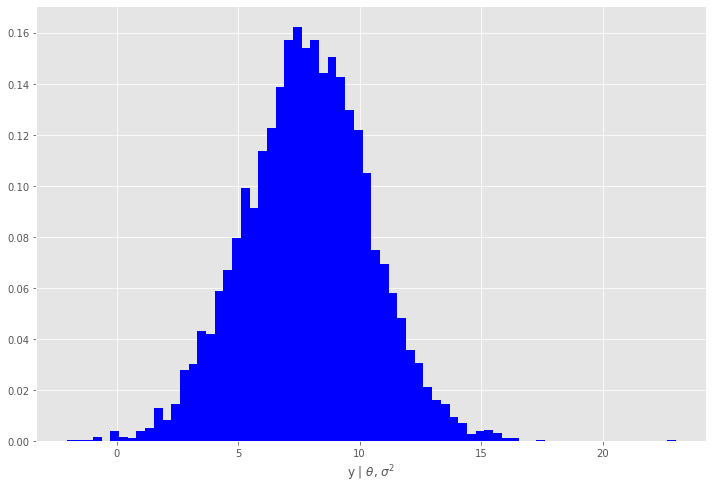

In [63]:
plt.figure(figsize=(12, 8))
plt.hist(y, bins = 70, color='blue', density = True)
plt.xlabel(r'y | $\theta$, $\sigma^2$')
plt.show()

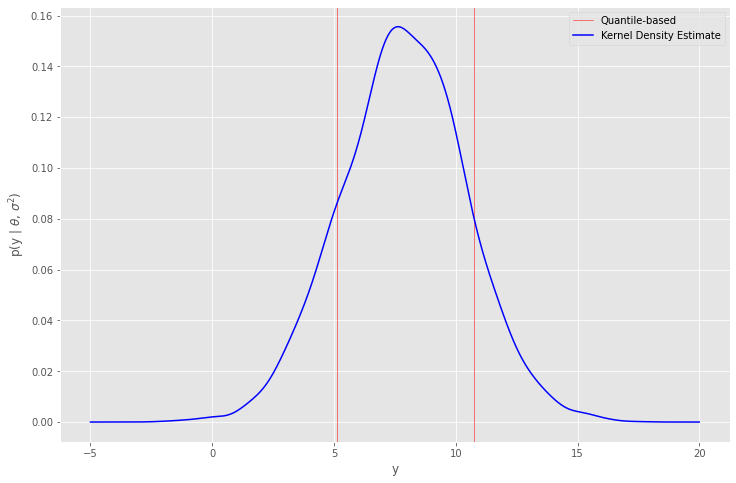

In [64]:
yy = np.arange(-5, 20, 0.01)
kde = gaussian_kde(y, bw_method='silverman')
pdf_kde = kde(yy)

plt.figure(figsize=(12, 8))
plt.axvline(x=CI[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=CI[1], color='r', linewidth=0.5)
plt.plot(yy, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel('y')
plt.ylabel(r'p(y | $\theta$, $\sigma^2$)')
plt.legend()
plt.show()

## ii. Sort these discrete probabilities in decreasing order.

In [65]:
pdf_sort = pdf_kde.copy()
pdf_sort.sort()
pdf_sort = pdf_sort[::-1]
pdf_sort

array([1.55616031e-01, 1.55615502e-01, 1.55613144e-01, ...,
       4.20004109e-12, 3.72875225e-12, 3.30900934e-12])

## iii. Find the first probability value such that the cumulative sum of the sorted values exceeds 0.75. Your HPD region includes all values of y which have a discretized probability greater than this cutoff. Describe your HPD region, and compare it to your quantile-based region.


In [66]:
i = 0
while True:
    i += 1
    if 0.01 * pdf_sort[0:i].sum()>= 0.75:    
        break
        
pdf_H1 = pdf_sort[i-1]
pdf_H2 = pdf_sort[i]

In [67]:
CI_H = [np.round(y[np.where(pdf_kde == pdf_H1)][0],2), np.round(y[np.where(pdf_kde == pdf_H2)][0],2)]
CI_H.reverse()
CI_H

[4.87, 7.9]

## d) Can you think of a physical justification for the mixture sampling distribution of Y ?

In [68]:
그런거같다.

SyntaxError: invalid syntax (<ipython-input-68-9b071917a545>, line 1)

(a) Find transition prob.matrix:=M

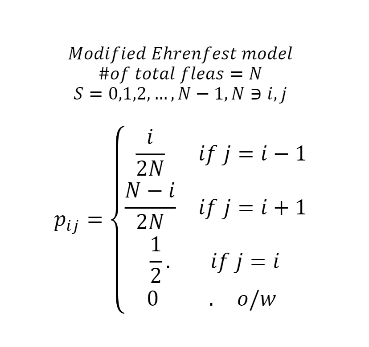

위의 식을 이용하여 matrix의 각 element를 구할 수 있고, 행렬 M을 구할 수 있다.

In [69]:
P = np.array([[0.5, 0.5, 0, 0, 0, 0],
              [0.1, 0.5, 0.4, 0, 0, 0],
              [0, 0.2, 0.5, 0.3, 0, 0],
              [0, 0, 0.3, 0.5, 0.2, 0],
              [0, 0, 0, 0.4, 0.5, 0.1],
              [0, 0, 0, 0, 0.5, 0.5]])

(b) Calculate $M^{10}$, $M^{50}$, $M^{100}$ and check each entry converges somewhere.

In [70]:
Plim=P
for i in range (10):
    Plim=Plim.dot(P)
print(Plim)
for i in range (50):
    Plim=Plim.dot(P)
print(Plim)
for i in range (100):
    Plim=Plim.dot(P)
print(Plim)

[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]
 [0.03952719 0.18063857 0.32815787 0.29593513 0.13231494 0.0234263 ]
 [0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]
 [0.02834152 0.14796756 0.30757955 0.31832745 0.16407894 0.03370499]
 [0.0234263  0.13231494 0.29593513 0.32815787 0.18063857 0.03952719]
 [0.01894886 0.11713152 0.28341519 0.33704986 0.19763594 0.04581862]]
[[0.03125019 0.15625057 0.31250038 0.31249962 0.15624943 0.03124981]
 [0.03125011 0.15625034 0.31250023 0.31249977 0.15624966 0.03124989]
 [0.03125004 0.15625011 0.31250008 0.31249992 0.15624989 0.03124996]
 [0.03124996 0.15624989 0.31249992 0.31250008 0.15625011 0.03125004]
 [0.03124989 0.15624966 0.31249977 0.31250023 0.15625034 0.03125011]
 [0.03124981 0.15624943 0.31249962 0.31250038 0.15625057 0.03125019]]
[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625

100번을 거듭제곱해본 결과, 1열과 6열은 0.03125로, 2열과 5열은 0.15625로, 3열과 4열은 0.3125로 converge하는 것을 관찰할 수 있었다.

(c) Check for all x in S, P('# of fleas on Mac at t=100'=x) is hardly affected by '# of fleas on Mac at t=0'.

[[0.5 0.5 0.  0.  0.  0. ]] 1
[[0.3 0.5 0.2 0.  0.  0. ]] 2
[[0.2  0.44 0.3  0.06 0.   0.  ]] 3
[[0.144 0.38  0.344 0.12  0.012 0.   ]] 4
[[0.11   0.3308 0.36   0.168  0.03   0.0012]] 5
[[0.08808 0.2924  0.36272 0.204   0.0492  0.0036 ]] 6
[[0.07328  0.262784 0.35952  0.230496 0.0672   0.00672 ]] 7
[[0.0629184 0.239936  0.3540224 0.249984  0.0830592 0.01008  ]] 8
[[0.0554528  0.22223168 0.3479808  0.2644224  0.0965664  0.01334592]] 9
[[0.04994957 0.2084384  0.34220979 0.275232   0.10784064 0.0163296 ]] 10
[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]] 11
[[0.04267291 0.18913725 0.33260386 0.28967516 0.12472323 0.02118758]] 12
[[0.04025018 0.18242585 0.32885938 0.29450803 0.13089044 0.02306612]] 13
[[0.03836767 0.17710989 0.32575244 0.29826801 0.13587988 0.0246221 ]] 14
[[0.03689483 0.17288927 0.32320058 0.30121169 0.13990459 0.02589904]] 15
[[0.03573634 0.16953216 0.32111951 0.30352786 0.14314415 0.02693998]] 16
[[0.03482139 0.16685815 0.31943098 0.30535744 0.145

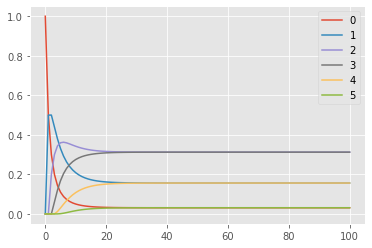

In [71]:
state=np.array([[1, 0, 0, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1));
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.1 0.5 0.4 0.  0.  0. ]] 1
[[0.1  0.38 0.4  0.12 0.   0.  ]] 2
[[0.088 0.32  0.388 0.18  0.024 0.   ]] 3
[[0.076  0.2816 0.376  0.216  0.048  0.0024]] 4
[[0.06616 0.254   0.36544 0.24    0.0684  0.006  ]] 5
[[0.05848  0.233168 0.35632  0.256992 0.0852   0.00984 ]] 6
[[0.0525568 0.217088  0.3485248 0.269472  0.0989184 0.01344  ]] 7
[[0.0479872  0.20452736 0.3419392  0.2788608  0.1100736  0.01661184]] 8
[[0.04444634 0.19464512 0.33643878 0.2860416  0.11911488 0.01931328]] 9
[[0.04168768 0.18683348 0.33188992 0.29159839 0.1264224  0.02156813]] 10
[[0.03952719 0.18063857 0.32815787 0.29593513 0.13231494 0.0234263 ]] 11
[[0.03782745 0.17571445 0.3251149  0.2993409  0.13705765 0.02494465]] 12
[[0.03648517 0.17179393 0.3226455  0.30202798 0.14086933 0.02617809]] 13
[[0.03542198 0.16866865 0.32064872 0.30415537 0.1439293  0.02717598]] 14
[[0.03457785 0.16617506 0.31903843 0.30584402 0.14638371 0.02798092]] 15
[[0.03390643 0.16418414 0.31774245 0.30718703 0.14835112 0.02862883]] 16
[[0.03337

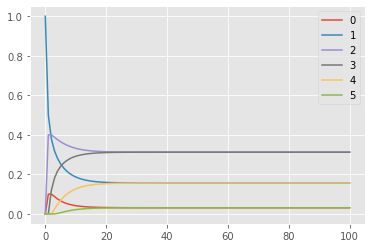

In [72]:
state=np.array([[0, 1, 0, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1));
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.  0.2 0.5 0.3 0.  0. ]] 1
[[0.02 0.2  0.42 0.3  0.06 0.  ]] 2
[[0.03  0.194 0.38  0.3   0.09  0.006]] 3
[[0.0344 0.188  0.3576 0.3    0.108  0.012 ]] 4
[[0.036   0.18272 0.344   0.30048 0.12    0.0168 ]] 5
[[0.036272 0.17816  0.335232 0.30144  0.128496 0.0204  ]] 6
[[0.035952  0.1742624 0.329312  0.302688  0.134736  0.0230496]] 7
[[0.03540224 0.1709696  0.32516736 0.304032   0.1394304  0.0249984 ]] 8
[[0.03479808 0.16821939 0.32218112 0.30533837 0.1430208  0.02644224]] 9
[[0.03422098 0.16594496 0.31997983 0.30653184 0.14579919 0.0275232 ]] 10
[[0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]] 11
[[0.03326039 0.16255745 0.31706916 0.30847503 0.14967045 0.02896752]] 12
[[0.03288594 0.16132275 0.31610007 0.30922645 0.15101399 0.0294508 ]] 13
[[0.03257524 0.16032436 0.31534707 0.30984884 0.15207769 0.0298268 ]] 14
[[0.03232006 0.15951922 0.31475793 0.31035962 0.15292201 0.03012117]] 15
[[0.03211195 0.15887122 0.31429454 0.31077599 0.15359351 0.03035279]] 16
[[0.03194

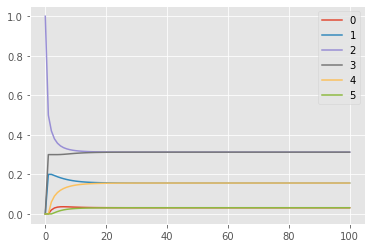

In [73]:
state=np.array([[0, 0, 1, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1))
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.  0.  0.3 0.5 0.2 0. ]] 1
[[0.   0.06 0.3  0.42 0.2  0.02]] 2
[[0.006 0.09  0.3   0.38  0.194 0.03 ]] 3
[[0.012  0.108  0.3    0.3576 0.188  0.0344]] 4
[[0.0168  0.12    0.30048 0.344   0.18272 0.036  ]] 5
[[0.0204   0.128496 0.30144  0.335232 0.17816  0.036272]] 6
[[0.0230496 0.134736  0.302688  0.329312  0.1742624 0.035952 ]] 7
[[0.0249984  0.1394304  0.304032   0.32516736 0.1709696  0.03540224]] 8
[[0.02644224 0.1430208  0.30533837 0.32218112 0.16821939 0.03479808]] 9
[[0.0275232  0.14579919 0.30653184 0.31997983 0.16594496 0.03422098]] 10
[[0.02834152 0.14796756 0.30757955 0.31832745 0.16407894 0.03370499]] 11
[[0.02896752 0.14967045 0.30847503 0.31706916 0.16255745 0.03326039]] 12
[[0.0294508  0.15101399 0.30922645 0.31610007 0.16132275 0.03288594]] 13
[[0.0298268  0.15207769 0.30984884 0.31534707 0.16032436 0.03257524]] 14
[[0.03012117 0.15292201 0.31035962 0.31475793 0.15951922 0.03232006]] 15
[[0.03035279 0.15359351 0.31077599 0.31429454 0.15887122 0.03211195]] 16
[[0.03053

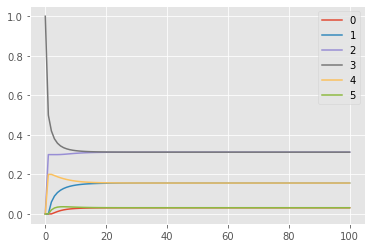

In [74]:
state=np.array([[0, 0, 0, 1, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1))
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.  0.  0.  0.4 0.5 0.1]] 1
[[0.   0.   0.12 0.4  0.38 0.1 ]] 2
[[0.    0.024 0.18  0.388 0.32  0.088]] 3
[[0.0024 0.048  0.216  0.376  0.2816 0.076 ]] 4
[[0.006   0.0684  0.24    0.36544 0.254   0.06616]] 5
[[0.00984  0.0852   0.256992 0.35632  0.233168 0.05848 ]] 6
[[0.01344   0.0989184 0.269472  0.3485248 0.217088  0.0525568]] 7
[[0.01661184 0.1100736  0.2788608  0.3419392  0.20452736 0.0479872 ]] 8
[[0.01931328 0.11911488 0.2860416  0.33643878 0.19464512 0.04444634]] 9
[[0.02156813 0.1264224  0.29159839 0.33188992 0.18683348 0.04168768]] 10
[[0.0234263  0.13231494 0.29593513 0.32815787 0.18063857 0.03952719]] 11
[[0.02494465 0.13705765 0.2993409  0.3251149  0.17571445 0.03782745]] 12
[[0.02617809 0.14086933 0.30202798 0.3226455  0.17179393 0.03648517]] 13
[[0.02717598 0.1439293  0.30415537 0.32064872 0.16866865 0.03542198]] 14
[[0.02798092 0.14638371 0.30584402 0.31903843 0.16617506 0.03457785]] 15
[[0.02862883 0.14835112 0.30718703 0.31774245 0.16418414 0.03390643]] 16
[[0.02914

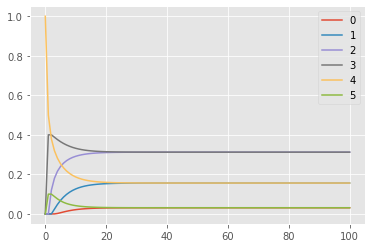

In [75]:
state=np.array([[0, 0, 0, 0, 1, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1))
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.  0.  0.  0.  0.5 0.5]] 1
[[0.  0.  0.  0.2 0.5 0.3]] 2
[[0.   0.   0.06 0.3  0.44 0.2 ]] 3
[[0.    0.012 0.12  0.344 0.38  0.144]] 4
[[0.0012 0.03   0.168  0.36   0.3308 0.11  ]] 5
[[0.0036  0.0492  0.204   0.36272 0.2924  0.08808]] 6
[[0.00672  0.0672   0.230496 0.35952  0.262784 0.07328 ]] 7
[[0.01008   0.0830592 0.249984  0.3540224 0.239936  0.0629184]] 8
[[0.01334592 0.0965664  0.2644224  0.3479808  0.22223168 0.0554528 ]] 9
[[0.0163296  0.10784064 0.275232   0.34220979 0.2084384  0.04994957]] 10
[[0.01894886 0.11713152 0.28341519 0.33704986 0.19763594 0.04581862]] 11
[[0.02118758 0.12472323 0.28967516 0.33260386 0.18913725 0.04267291]] 12
[[0.02306612 0.13089044 0.29450803 0.32885938 0.18242585 0.04025018]] 13
[[0.0246221  0.13587988 0.29826801 0.32575244 0.17710989 0.03836767]] 14
[[0.02589904 0.13990459 0.30121169 0.32320058 0.17288927 0.03689483]] 15
[[0.02693998 0.14314415 0.30352786 0.32111951 0.16953216 0.03573634]] 16
[[0.0277844  0.14574764 0.30535744 0.31943098 0.166

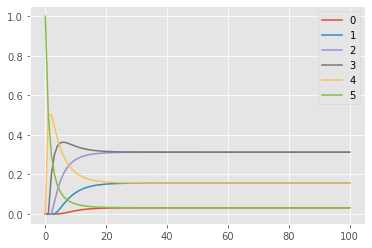

In [76]:
state=np.array([[0, 0, 0, 0, 0, 1]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,P);
  print(state,(x+1))
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

Initial을 어떻게 주든지 t=100에서는 같은 곳으로 수렴하는 것을 관찰할 수 있었다.

(d) Let T=50000, and consider each W(t in T) as a sampling of distribution D. Check how D looks like and compare D with X~Binomial(5,1/2).

{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


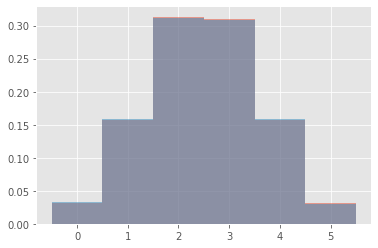

In [77]:
np.random.seed(1)
chain=0
chainHist=chain
for i in range(50000):
    pb=P[chain]
    pb=np.array(pb).flatten()
    chain=np.random.choice(6,1,p=pb)
    chainHist=np.append(chainHist,chain)

count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)
plt.figure()
bi=np.random.binomial(5, 0.5, 50000)
plt.hist(bi,bins=np.linspace(-0.5,5.5,7), alpha=0.5, density=True)
plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True)
plt.show()

Binomial의 histogram과 매우 유사한 것을 확인할 수 있다.

(e) Check P('# of fleas on Mac at t=100'=x) ~ P(x)

<IPython.core.display.Javascript object>


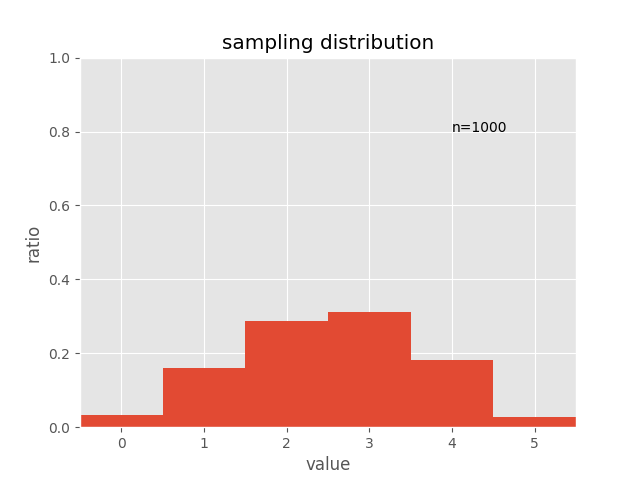

In [78]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def update(curr):
    if curr == 1000:
        a.event_source.stop()
    plt.cla()
    plt.hist(chainHist[:curr], bins=np.linspace(-0.5,5.5,7), density=True)
    plt.axis([-0.5,5.5, 0, 1])
    plt.gca().set_title('sampling distribution')
    plt.gca().set_ylabel('ratio')
    plt.gca().set_xlabel('value')
    plt.gca().annotate('n={}'.format(curr), [4,0.8])


fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 0.1)

plt.show()

In [79]:
distpd=[count.get(0)*1/50000, count.get(1)*1/50000, count.get(2)*1/50000, count.get(3)*1/50000, count.get(4)*1/50000, count.get(5)*1/50000]

In [80]:
print(stateHist[100])
print([0.03125, 0.15625, 0.3125,  0.3125,  0.15625, 0.03125])
print(distpd)

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]
[0.03264, 0.15928, 0.31128, 0.30852, 0.15802, 0.03028]


세 결과가 매우 비슷한 것을 확인할 수 있었다.